In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a1=np.random.randn(100,1)
a2=np.random.randn(100,1)+5
a=np.hstack((a1,a2,np.zeros_like(a1)))
b1=0.5*np.random.randn(100,1)+5
b2=np.random.randn(100,1)+1
b=np.hstack((b1,b2,np.ones_like(b1)))
x=np.vstack((a,b))
x

array([[-0.66231693,  5.1383494 ,  0.        ],
       [ 0.39622926,  5.34756772,  0.        ],
       [ 0.84993847,  7.0816114 ,  0.        ],
       [ 0.40326078,  6.00299564,  0.        ],
       [ 0.00963803,  4.77870633,  0.        ],
       [ 0.12469274,  5.95046643,  0.        ],
       [ 0.10248001,  7.41517343,  0.        ],
       [ 0.23695811,  5.20373226,  0.        ],
       [ 1.09455627,  4.57092159,  0.        ],
       [-0.32023871,  6.06230859,  0.        ],
       [ 0.33842494,  5.09355333,  0.        ],
       [ 1.27931061,  4.27040818,  0.        ],
       [ 0.11986398,  4.5424153 ,  0.        ],
       [-1.35676784,  4.66728423,  0.        ],
       [-0.66773184,  2.74466741,  0.        ],
       [-0.24701142,  5.28713904,  0.        ],
       [-0.97536743,  5.41960423,  0.        ],
       [-0.51293187,  3.83089518,  0.        ],
       [ 0.29708983,  3.05457897,  0.        ],
       [ 0.26579709,  3.34425743,  0.        ],
       [-1.51178955,  5.92009499,  0.   

In [3]:
m=x.shape[0]

In [4]:
x=np.random.permutation(x)

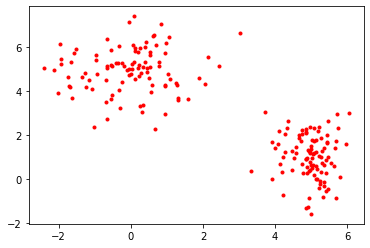

In [5]:
plt.plot(x[:,0],x[:,1],"r.")
plt.show()

In [6]:
y=np.copy(x[:,2]).reshape((-1,1))
y

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [7]:
x1=np.copy(x[x[:,2]==1])
x0=np.copy(x[x[:,2]==0])

In [8]:
X=np.delete(x,2, axis=1)
n=X.shape[1]
X

array([[ 5.26689033,  0.9968696 ],
       [ 4.85731236,  0.92434859],
       [-1.56841899,  5.72324958],
       [ 0.42433259,  6.2591153 ],
       [ 4.36854761,  2.65296642],
       [ 0.10248001,  7.41517343],
       [ 0.94655282,  2.95303309],
       [ 0.50701841,  4.61290633],
       [ 5.27026343,  1.87810191],
       [ 4.8562144 ,  2.13883863],
       [ 5.22220482,  1.03949689],
       [-0.54326942,  3.65227651],
       [ 0.52486023,  5.80724682],
       [ 5.45806262,  1.01628561],
       [-0.24701142,  5.28713904],
       [ 4.97812428,  0.78909654],
       [ 4.85195222,  2.08547197],
       [ 5.21777464, -0.39948687],
       [ 1.09455627,  4.57092159],
       [-0.66773184,  2.74466741],
       [ 4.85823287,  0.92669269],
       [ 0.12469274,  5.95046643],
       [-0.53797851,  5.86635448],
       [ 5.73984641,  2.30712542],
       [-1.93209348,  5.24441955],
       [ 0.78167208,  5.15638494],
       [ 0.53291197,  5.64412184],
       [ 0.40326078,  6.00299564],
       [ 5.25927664,

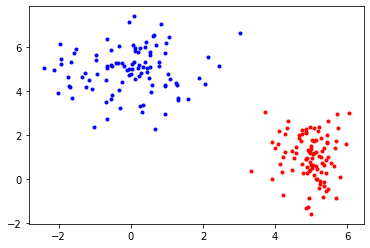

In [9]:
plt.plot(x0[:,0],x0[:,1],"b.",
        x1[:,0],x1[:,1],"r.")
plt.show()

In [10]:
#functii for days

def add1laX(X):
    a=np.ones_like(X[:,0]).reshape((X.shape[0],1))
    return np.hstack((a,X))

def g(x):
    a=(1+np.exp(-x))
    return 1/a

def H(teta,X):
    return teta.T.dot(X)

def h(teta,X):
    return g(H(teta,X))

def cost(Y,y):  #se scrie pe ramuri lol... dar pentru y in {0,1} e safe 
    return -(y*np.log(Y)+(1-y)*np.log(1-Y))
    
def J(teta,X,y):
    a=1/m
    s=0
    for i in range(m):
       s+=cost(h(teta,X[i,:]),y[i])
    return a*s

def dJdteta(k,teta,X,y):
    a=1/m
    s=0
    for i in range(m):
        s+=(h(teta,X[i,:])-y[i])*X[i,k]
    return a*s
        
def gradd(teta,alpha,X,y):
    temp=np.copy(teta)
    for j in range(teta.shape[0]):
        temp[j]-=alpha*dJdteta(j,teta,X,y)
    return temp

TODO:

de definit $J$, functia cost ca la regresie liniara

de facut un plot cu $J(\theta)$ vs $\theta$ sa vezi ca nu e convex in general lol

In principiu ne trebuie o functie convexa de cost...

In [11]:
X=add1laX(X)
X

array([[ 1.        ,  5.26689033,  0.9968696 ],
       [ 1.        ,  4.85731236,  0.92434859],
       [ 1.        , -1.56841899,  5.72324958],
       [ 1.        ,  0.42433259,  6.2591153 ],
       [ 1.        ,  4.36854761,  2.65296642],
       [ 1.        ,  0.10248001,  7.41517343],
       [ 1.        ,  0.94655282,  2.95303309],
       [ 1.        ,  0.50701841,  4.61290633],
       [ 1.        ,  5.27026343,  1.87810191],
       [ 1.        ,  4.8562144 ,  2.13883863],
       [ 1.        ,  5.22220482,  1.03949689],
       [ 1.        , -0.54326942,  3.65227651],
       [ 1.        ,  0.52486023,  5.80724682],
       [ 1.        ,  5.45806262,  1.01628561],
       [ 1.        , -0.24701142,  5.28713904],
       [ 1.        ,  4.97812428,  0.78909654],
       [ 1.        ,  4.85195222,  2.08547197],
       [ 1.        ,  5.21777464, -0.39948687],
       [ 1.        ,  1.09455627,  4.57092159],
       [ 1.        , -0.66773184,  2.74466741],
       [ 1.        ,  4.85823287,  0.926

In [12]:
teta=np.random.randn(X.shape[1])
teta

array([ 0.23045917,  0.65070202, -0.14371166])

$\text{min}_{\theta}J(\theta)$: Vrem sa gasim $\theta$ pentru care $J(\theta)$ e minim, asa cum ne-am aranjat, lucram cu o functie convexa deci problema merge tzutz...

In [13]:
alpha=0.01

In [14]:
J(teta,X,y)

array([0.28290449])

In [15]:
for l in range(250):
    teta=gradd(teta,alpha,X,y)
    print(J(teta,X,y))

[0.27411017]
[0.26581009]
[0.25797111]
[0.25056234]
[0.24355504]
[0.23692249]
[0.23063986]
[0.22468408]
[0.21903376]
[0.21366906]
[0.20857155]
[0.20372415]
[0.19911101]
[0.19471742]
[0.19052973]
[0.18653528]
[0.18272229]
[0.17907982]
[0.17559772]
[0.17226653]
[0.16907744]
[0.16602227]
[0.16309339]
[0.16028368]
[0.1575865]
[0.15499567]
[0.15250539]
[0.15011026]
[0.14780523]
[0.14558556]
[0.14344682]
[0.14138486]
[0.1393958]
[0.13747597]
[0.13562195]
[0.13383051]
[0.13209864]
[0.13042347]
[0.12880234]
[0.12723272]
[0.12571222]
[0.1242386]
[0.12280976]
[0.12142368]
[0.12007848]
[0.11877239]
[0.1175037]
[0.11627082]
[0.11507226]
[0.11390656]
[0.11277237]
[0.11166842]
[0.11059347]
[0.10954638]
[0.10852603]
[0.10753138]
[0.10656145]
[0.10561528]
[0.10469198]
[0.10379069]
[0.10291059]
[0.1020509]
[0.1012109]
[0.10038986]
[0.09958712]
[0.09880203]
[0.09803398]
[0.09728239]
[0.09654668]
[0.09582633]
[0.09512082]
[0.09442966]
[0.09375238]
[0.09308854]
[0.09243769]
[0.09179943]
[0.09117337]
[0.09

In [16]:
teta

array([ 0.14239821,  0.83446021, -0.71753615])

Asta ne spune ca $h_{\theta}(x)=g(\theta_0+\theta_1x_1+\theta_2x_2)$ si daca facem $\theta_0+\theta_1x_1+\theta_2x_2=0$ (aka unde $g(x)=0.5$) gasim decision boundery.

$\theta_0+\theta_1x_1+\theta_2x_2=0\quad <=> \quad x_2=\frac{-\theta_0-\theta_1x_1}{\theta_2}$ 

In [17]:
xx=np.linspace(-2,6,200)
a=(-teta[0]-teta[1]*xx)
b=teta[2]
yy=a/b

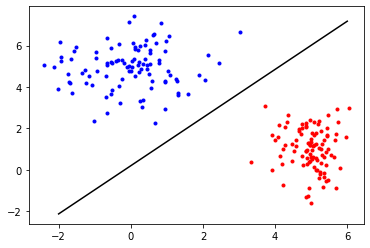

In [18]:
plt.plot(x0[:,0],x0[:,1],"b.",
        x1[:,0],x1[:,1],"r.",
        xx,yy,"k")
plt.show()